# 2章 自然言語と単語の分散表現

この章では，コンピュータに言葉を理解させるということがどういうことなのか，どのようなアプローチが存在するのかを考察する．特に，古典的な手法を考え，ディープラーニング（ニューラルネットワーク）をベースとした手法は次章以降に考える．

## 2.1 自然言語処理とは

#### 自然言語処理（NLP）の目標
人の話す言葉をコンピュータに理解させ，私たちにとって役立つことをコンピュータに行わせること．

### 2.1.1 単語の意味

#### 本章のテーマ
私たちの言葉は単語によって構成されるので，コンピュータが単語の意味を理解することは重要になる．
- シソーラスによる手法
- カウントベースの手法
- 推論ベースの手法（word2vec）

#### それぞれの概要
- シソーラス：人の手によってつくられた類似辞書
- カウントベース：統計情報から単語を表現する手法
- 推論ベース：ニューラルネットワーク

## 2.2 シソーラス

シソーラスは基本的には，類似辞書であり，「同じ意味の単語（同義語）や「意味の似た単語（類義語）」が同じグループに分類されている．また，自然言語処理において利用されるシソーラスでは，単語の間で「上位と下位」，「全体と部分」などの，より細かい関連性が定義されている場合がある．

### 2.2.1 WordNet

#### WordNet
自然言語処理の分野において，最も有名なシソーラス．類義語を取得したり，単語ネットワークを利用したりできる．単語ネットワークを利用して単語間の類似度を算出することも可能．

### 2.2.2 シソーラスの問題点

WordNetのようなシソーラスは，多くの単語に対して同義語や階層構造などの関係性が定義されている．しかし人の手によるラベル付けには大きな欠点がいくつか存在する．

#### 時代の変化に対応するのが困難
→単語の変化に対応するためにシソーラスを人手によって絶えず更新する必要がある．
#### 人の作業コストが高い
→膨大な単語に対して，単語の関連付けを行うのは非常に大変な作業になる．
#### 単語の細かなニュアンスを表現できない
→シソーラスは，類義語として似たような単語をグループ化するが，その中の単語はそれぞれに異なるニュアンスを持つ．例えば，ヴィンテージやレトロは同じような意味を表すが，使われ方は異なる，など．

- カウントベースの手法
- ニューラルネットワークを使った推論ベースの手法

以上2つは，大量のテキストデータから自動的に単語の意味を抽出する．これはすなわち，人の手作業によって単語を関連付けるという重労働からの解放を意味する．

## 2.3 カウントベースの手法

カウントベースの手法を進む際にはコーパスを利用する．

#### コーパス
自然言語処理の研究やアプリケーションのために目的をもって収集されたデータのこと．コーパスは人の手によって書かれたものであり，コーパスには自然言語に対する人の知識がふんだんに含まれている．

#### カウントベースの手法の目標
人の知識が詰まったコーパスから，自動的に，効率よく，エッセンスを抽出すること．

### 2.3.1 Pythonによるコーパスの下準備

In [2]:
# まずは小さなテキストデータから
text = 'You say goodbye and I say hello.'

# 小文字に統一してカンマを一つの単語にから独立させる
text = text.lower()
text = text.replace('.', ' .')
print(text)

# 単語分割
words = text.split(' ')
print(words)
print(type(words))

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']
<class 'list'>


In [3]:
# 単語のIDと単語の対応表をPythonのディクショナリで作成

word_to_id = {}  # "word": xx
id_to_word = {}  # xx: "word"

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)  # その時点のword_to_idの長さ(例えば最初は0)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [4]:
# 中身の確認
print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [6]:
# 単語から単語IDの検索，単語IDから単語の検索が可能に
print(id_to_word[1])
print(word_to_id['hello'])

say
5


In [7]:
# 単語リストからNumPy配列の単語IDリストに変換
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 1 5 6]


In [18]:
# ただのテキストからコーパス作成までの処理を関数にまとめる

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [21]:
# 関数を使ってコーパスの前処理を行う
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus, word_to_id, id_to_word)

[0 1 2 3 4 1 5 6] {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


これからの目標は，コーパスを使って「単語の意味」を抽出すること．今後はカウントベースの手法を見ていき，この手法によって単語をベクトルで表すことができるようになる．

### 2.3.2 単語の分散表現

#### 単語の分散表現
単語の意味を的確にとらえたベクトル表現

### 2.3.3 分布仮説

#### 分布仮説
単語の意味は，周囲の単語によって形成されるという考え．

#### コンテキスト
文脈．ここではその周囲に存在する単語を指す．(window size: コンテキストのサイズ，周囲の単語をどれだけ含めるかを指定するもの)

### 2.3.4 共起行列

#### 共起行列
共起する単語をテーブルにまとめたもの．

In [23]:
# カウントベース手法の下準備
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [24]:
# 共起行列を手打ちで作成する

C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype=np.int32)

In [25]:
# 各単語のベクトル
print(C[0])
print(C[4])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]


In [26]:
# コーパスから共起行列を作成する関数

def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

この関数を使用することで，コーパスがどれだけ大きくなったとしても，自動で共起行列を作ることができる．今後はこの関数を使用して，コーパスの共起行列を作成する．

### 2.3.5 ベクトル間の類似度

共起行列によって単語をベクトルで表現することができた．次にベクトル間の類似度を計測する方法を考える．

ベクトル間の類似度を計算する方法は様々な方法があるが，ベクトルの内積やユークリッド距離などが代表例として挙げられる．中でも単語のベクトル表現の類似度に関しては，コサイン類似度がよく用いられる．

#### コサイン類似度
直観的なイメージとしては，2つのベクトルがどれだけ同じ方向を向いているかを表す．2つのベクトルが完全に同じ方向を向いているときはコサイン類似度は1になり，完全に逆向きだとコサイン類似度は―1になる．

In [28]:
# コサイン類似度の実装

def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)  # xの正規化
    ny = y / (np.sqrt(np.sum(y**2)) + eps)  # yの正規化
    return np.dot(nx, ny)

In [31]:
# youとiの類似度を計算してみる
import sys 
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # [you]の単語ベクトル
c1 = C[word_to_id['i']]    # [i]の単語ベクトル
print(cos_similarity(c0, c1))

0.7071067691154799


### 2.3.6 類似単語のランキング表示

ある単語がクエリとして与えられたときに，そのクエリに対して類似した単語を上位から順に表示する関数．（most_similar）

- クエリ（単語）
- 単語から単語IDへのディクショナリ 
- 単語IDから単語へのディクショナリ
- 単語ベクトルをまとめた行列，各行に対応する単語のベクトルが格納されていることを想定する
- 上位何位まで表示するか

In [32]:
# most_similar

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    
    # ①クエリを取り出す
    if query not in word_to_id:
        print('%s is not found' % query)
        return 
    
    print('\n[query]' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # ②コサイン類似度の算出
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # ③コサイン類似度の結果から，その値を高い順に出力
    count = 0
    for i in (-1*similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return 

In [33]:
# youをクエリとして類似する単語を表示してみる
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## 2.4 カウントベースの手法の改善

### 2.4.1 相互情報量

#### 相互情報量（PMI）
単純な回数だけで関連性を考慮するのではなく，単語独自の出現回数を考慮した式を用いたスコアづけを行う．

In [34]:
# 共起行列をPPMI行列に変換する関数を実装する
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zers_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M

In [37]:
# 実際に共起行列をPPMI行列に変換する

import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 有効桁3桁で表示
print('covariance matrix')
print(C)
print('-' * 50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


### 2.4.2 次元削減

#### 次元削減
ベクトルの次元を削減する．単に削減するのではなく，重要な情報をできるだけ残した上で削減する．データの分布をみて，重要な軸を見つける．

#### 疎なベクトル
ベクトルの中のほとんどの要素が0である行列のこと．密なベクトルこそが求めたい単語の分散表現である．

#### 特異値分解(Singular Value Decomposition:SVD)
任意の行列を3つの行列の積に変換する．

### 2.4.3 SVDによる次元削減

In [38]:
# SVDの実装

import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
courpus, word_to_id, id_to_word = preprocess(text)
vocav_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(C[0])
print(W[0])
print(U[0])

Duplicate key in file WindowsPath('C:/Users/81804/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')


[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


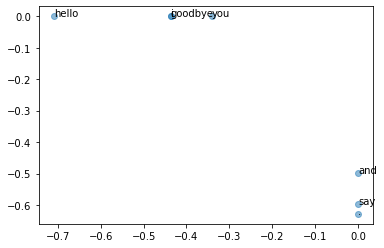

In [39]:
# 各単語を2次元のベクトルで表し，それをグラフにプロットする．

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

### 2.4.4 PTBデータセット

#### PennTreebank(PTB)
提案手法の品質を測定するためのベンチマークとしてよく利用される．

In [41]:
# PTBデータセットの内容を少し確認してみる
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### 2.4.5 PTBデータセットでの評価

In [43]:
# PTBデータセットに対してカウントベースの手法を適用する
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD(fast!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, 
                            random_state=None)
    
except ImportError:
    # SVD(slow)
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

counting co-occurrence ...
calculating PPMI ...


C:\Users\81804\working_directory\zero_dl_2\common\util.py:139: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\81804\working_directory\zero_dl_2\common\util.py:139: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
89.0% done
90.0% done
91.0% done
92.0% do

## 2.5 まとめ

### 本章で学んだこと
- WordNetなどのシソーラスを利用して，類義語の取得や単語間の類似度の計測など有用なタスクを行うことができる
- シソーラスを用いる手法には，シソーラスを作成する人の作業量や新しい単語への対応などの問題がある
- 現在ではコーパスを利用して単語をベクトル化するアプローチが主流である．
- 近年の単語ベクトル化の手法では．「単語の意味は周囲の単語によって形成される」という分布仮説に基づくものがほとんどである．
- カウントベースの手法は，コーパス中の各単語に対して，その単語の周囲の単語の頻度をカウントし，集計する（＝共起行列）
- 共起行列をPPMI行列に変換し，それを次元削減することで，巨大な「疎なベクトル」を小さな「密なベクトル」へと変換することができる．
- 単語のベクトル空間では，意味的に近い言葉はその距離が近くなることが期待される．